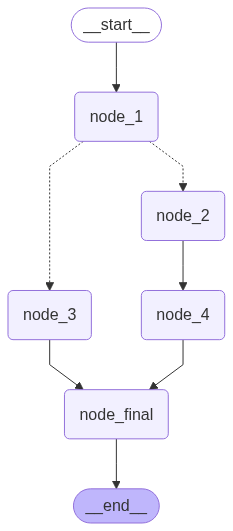

inside node_1
inside node_2
inside node_3
inside node_4
inside node_final


{'message': 'HiHello, from node 1Hello, from node 2Hello, from node 3Hello, from node 4Hello, from node final'}

In [17]:
from turtle import st
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel
from typing import Annotated, Literal
from operator import add
from typing import Sequence
from IPython.display import Image, display

class State(BaseModel):
    message: Annotated[str, add]

def node_1(state: State):
    print(f"inside node_1")
    return State(message="Hello, from node 1")

def node_2(state: State):
    print(f"inside node_2")
    return State(message="Hello, from node 2")

def node_3(state: State):
    print(f"inside node_3")
    return State(message="Hello, from node 3")

def node_4(state: State):
    print(f"inside node_4")
    return State(message="Hello, from node 4")

def node_final(state: State):
    print(f"inside node_final")
    return State(message="Hello, from node final")

def conditional_edge(state: State) -> Sequence[Literal["node_2", "node_3"]]:
    return ["node_2", "node_3"]

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_final", node_final, defer=True)
builder.add_edge("node_2", "node_4")
builder.add_edge("node_3", "node_final")
builder.add_edge("node_4", "node_final")
builder.add_edge("node_final", END)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", conditional_edge, ["node_2", "node_3"])

graph = builder.compile()

# display the graph
display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke(State(message="Hi"))